<a href="https://colab.research.google.com/github/mkleshchenok/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/hw-week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%autosave 0

Autosave disabled


## 2. Machine Learning for Regression


In [2]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [4]:
!wget $data 

--2021-09-26 13:43:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.08s   

2021-09-26 13:43:28 (82.7 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [5]:
df = pd.read_csv('AB_NYC_2019.csv')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Distribution of price

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Look at the price variable. Does it have a long tail?

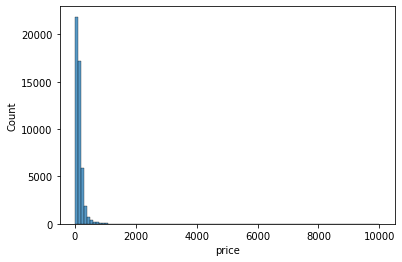

In [10]:
sns.histplot(df.price, bins=100)

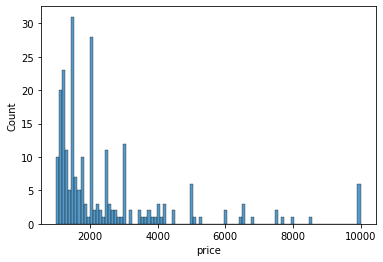

In [11]:
sns.histplot(df.price[df.price > 1000], bins=100)

Yes it has long tail.

In [12]:
price_logs = np.log1p(df.price)

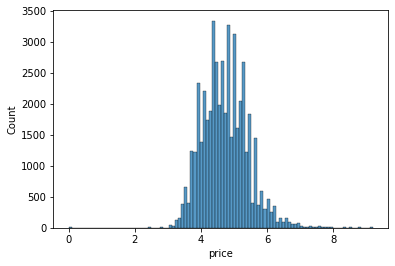

In [13]:
sns.histplot(price_logs, bins=100)

Missing values

In [14]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
df_hw=df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365',
'neighbourhood_group',
'room_type']]

In [19]:
df_hw.fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
df_hw.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group               0
room_type                         0
dtype: int64

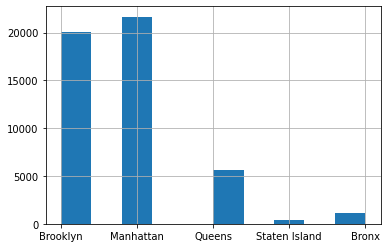

In [26]:
df_hw['neighbourhood_group'].hist()

A1 - Manhattan

Q2 - Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
df_full_train, df_test = train_test_split(df_hw, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [31]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [32]:
df_train.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.035428,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.146318,-0.060660,0.055084,0.134642,-0.117041,0.083666
price,0.035428,-0.146318,1.000000,0.046668,-0.048225,-0.052908,0.053746,0.080121
minimum_nights,0.027441,-0.060660,0.046668,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.048225,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.052908,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.053746,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.080121,0.138901,0.174477,0.165376,0.225913,1.000000


In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [36]:
df_train.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


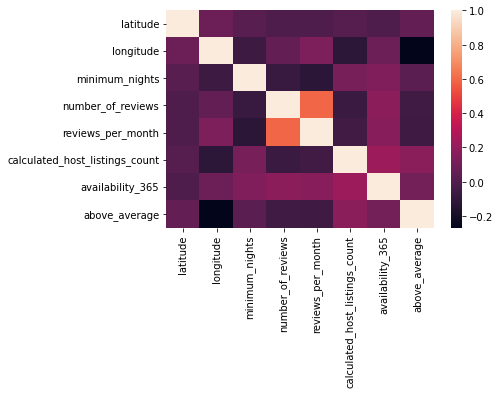

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_train.corr())
plt.show()

A2 - number_of_reviews and reviews_per_month

Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
Which of these two variables has bigger score?
Round it to 2 decimal digits using round(score, 2)

In [47]:
df_train['above_average']=(y_train>=152).astype(int)

In [64]:
df_val['above_average']=(y_val>=152).astype(int)
df_test['above_average']=(y_test>=152).astype(int)

In [50]:
from sklearn.metrics import mutual_info_score

In [59]:
round(mutual_info_score(df_train.above_average, df_train.neighbourhood_group),2), round(mutual_info_score(df_train.above_average, df_train.room_type),2)

(0.05, 0.14)

A3 - room_type

**Question 4**
Now let's train a logistic regression
Remember that we have two categorical variables in the data. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [61]:
from sklearn.feature_extraction import DictVectorizer

In [62]:
df_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group', 'room_type',
       'above_average'],
      dtype='object')

In [63]:
categorical=['neighbourhood_group', 'room_type']
numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'above_average']

In [65]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical+numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=1000)

In [84]:
model.fit(X_train[::-1], (y_train>=152).astype(int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_train

array([ 99,  57,  70, ..., 299,  65,  92])

In [85]:
model.intercept_[0]

-1.320707740583081e-05

In [86]:
model.coef_[0].round(3)

array([ 0.049, -0.   , -0.   , -0.004,  0.009,  0.001, -0.017, -0.024,
       -0.008,  0.053, -0.004, -0.   ,  0.006, -0.002,  0.016, -0.015])

In [87]:
y_pred = model.predict_proba(X_val)[:, 1]

In [93]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = (y_pred >= 0.5).astype(int)
df_pred['actual'] = (y_val>=152).astype(int)

In [95]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
round(df_pred.correct.mean(),2)

0.69

A4 - 0.69

**Question 5**
We have 9 features: 7 numerical features and 2 categorical.
Let's find the least useful one using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?
neighbourhood_group
room_type
number_of_reviews
reviews_per_month
note: the difference doesn't have to be positive